In [2]:
import google.auth
from google.cloud import storage
import json
import pandas as pd

credentials, project = google.auth.default()  
#List buckets using the default account on the current gcloud cli
client = storage.Client(credentials=credentials)
buckets = client.list_buckets()
for bucket in buckets:
    print(bucket)

#custom function to read data from cvs/sql/excel/xml file
def read_file_gcs(bucket_name, general_file_name):
    """
    Read a file from the bucket
    """

    # create storage client
    client = storage.Client()
    # get bucket with name
    BUCKET= client.get_bucket(bucket_name)
    # get bucket data as blob
    blob = BUCKET.blob(general_file_name)
    assert blob.exists()  # Will be false if the next line would raise NotFound
    # convert to string
    data = blob.download_as_string()
    return data

bucket_name = "cuda-programming-406720"
general_file_name = "tutorial_1.csv"  #cloudsql/table_creation.sql  sample.yml
data = read_file_gcs(bucket_name, general_file_name)
print(data)

<Bucket: cuda-programming-406720>
b'x,y\n5.4881350392732475,29.65450786127179\n7.151893663724195,34.99358978951999\n6.027633760716439,35.99427342345802\n5.448831829968968,24.815775427356154\n4.236547993389047,21.034959534504537\n6.458941130666561,29.44885970151621\n4.375872112626925,26.03457170516168\n8.917730007820797,40.20383605668101\n9.636627605010293,45.209618148604235\n3.8344151882577773,19.781916673047135\n7.917250380826646,35.25869735976178\n5.288949197529044,24.25954820175923\n5.680445610939323,31.285078338410024\n9.25596638292661,40.40569504519258\n0.7103605819788694,6.807265944716013\n0.8712929970154071,9.17242369467127\n0.2021839744032572,11.018668196092381\n8.32619845547938,36.27580657984814\n7.781567509498505,41.50571911298206\n8.700121482468191,37.761470008812395\n9.78618342232764,50.90932833944452\n7.9915856421672355,38.65285458514596\n4.6147936225293185,30.226785372020643\n7.805291762864554,39.269622248908675\n1.1827442586893322,14.123612828740345\n6.399210213275238,27

In [ ]:
import h5py
from google.cloud import storage
from io import BytesIO

# Replace 'your_bucket_name' and 'your_file_name.h5' with your actual bucket and file names
bucket_name = 'cuda-programming-406720'
file_name = 'QCD_LLP_samples/h5-files/100GeV_n3_events_100k_1mm_pileup.h5'

# Initialize a client
client = storage.Client()

# Get the bucket
bucket = client.get_bucket(bucket_name)

# Get the blob (file) from the bucket
blob = bucket.blob(file_name)

# Read the file directly into memory
file_contents = BytesIO(blob.download_as_string())

# Open the .h5 file using h5py
with h5py.File(file_contents, 'r') as f:
    # Now you can read datasets, attributes, etc. from the file
    print(f.keys())
    dataset = f['Track']  # Replace 'dataset_name' with the actual dataset name
    lenght_data = f['lengths'][:1000]
    data = dataset[:1000]  # Read the entire dataset into memory (you can also read specific parts)

In [2]:
import jax.numpy as jnp
import numpy as np

In [13]:
d = np.array([list(element) for element in data.tolist()])
np.min(d, axis=0)

array([ 5.08710044e-04, -8.56699944e+00, -3.13911176e+00, -6.72592163e+01,
       -1.92415161e+02])

In [5]:
import numpy as np
from numpy.lib.recfunctions import append_fields


append_fields(data, 'label', np.zeros((data.shape[0])))

In [4]:
!curl https://cernbox.cern.ch/remote.php/dav/public-files/ry8Zv08AGIH4fWt/h5_files/QCD_multijet_events_200k.h5 | gsutil cp - gs://cuda-programming-406720/QCD_multijet_events_200k.h5

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0Copying from <STDIN>...
100  378M  100  378M    0     0   427k      0  0:15:06  0:15:06 --:--:--  922k  0  0:26:45  0:01:39  0:25:06  161k206k283k      0  0:22:49  0:04:35  0:18:14  276k/ [0 files][264.0 KiB/    0.0 B]                                                / [0 files][100.0 MiB/    0.0 B]      0.0 B/s                                   / [0 files][200.1 MiB/    0.0 B]      0.0 B/s                                   
/ [1 files][    0.0 B/    0.0 B]      0.0 B/s                                   
Operation completed over 1 objects.                                              


In [1]:
!curl https://cernbox.cern.ch/remote.php/dav/public-files/ry8Zv08AGIH4fWt/h5_files/QCD_multijet_events_200k_pileup.h5 | gsutil cp - gs://cuda-programming-406720/QCD_LLP_samples/h5-files/QCD_multijet_events_200k_pileup.h5

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0Copying from <STDIN>...
100 1124M  100 1124M    0     0   747k      0  0:25:39  0:25:39 --:--:-- 1217k  0:17 --:--:--     0/ [0 files][264.0 KiB/    0.0 B]                                                / [0 files][100.0 MiB/    0.0 B]      0.0 B/s                                   684k      0  0:28:02  0:05:15  0:22:47  800k/ [0 files][200.1 MiB/    0.0 B]      0.0 B/s                                   / [0 files][300.1 MiB/    0.0 B]      0.0 B/s                                   / [0 files][400.1 MiB/    0.0 B]      0.0 B/s                                   / [0 files][500.2 MiB/    0.0 B]      0.0 B/s                                   / [0 files][600.2 MiB/    0.0 B]      0.0 B/s                                   / [0 files][700.2 MiB/    0.0 B]     

In [1]:
!curl https://cernbox.cern.ch/remote.php/dav/public-files/ry8Zv08AGIH4fWt/h5_files/500GeV_n3_events_100k_1mm_pileup.h5 | gsutil cp - gs://cuda-programming-406720/QCD_LLP_samples/h5-files/500GeV_n3_events_100k_1mm_pileup.h5
!curl https://cernbox.cern.ch/remote.php/dav/public-files/ry8Zv08AGIH4fWt/h5_files/100GeV_n3_events_100k_1mm_pileup.h5 | gsutil cp - gs://cuda-programming-406720/QCD_LLP_samples/h5-files/100GeV_n3_events_100k_1mm_pileup.h5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Copying from <STDIN>...
 42 1124M   42  475M    0     0   269k      0  1:11:18  0:30:07  0:41:11  433k   0      0 --:--:--  0:04:28 --:--:--     0:--:--  0:07:31 --:--:--     0--  0:10:00 --:--:--     0--:--  0:10:50 --:--:--     0     0-  0:16:06 --:--:--     0 0     0    0     0      0      0 --:--:--  0:17:39 --:--:--     03 1073k/ [0 files][264.0 KiB/    0.0 B]                                                  599k/ [0 files][100.0 MiB/    0.0 B]      0.0 B/s                                   / [0 files][200.1 MiB/    0.0 B]      0.0 B/s                                   04  732k 0:27:06  0:51:34 2280k/ [0 files][300.1 MiB/    0.0 B]      0.0 B/s                                   
curl: (18) transfer closed with 680614096 bytes remaining to read
/ [1 

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
import numpy as np
from sbi.analysis import pairplot
from sbi.utils import BoxUniform
from torch.distributions import Normal
import torch

import pickle

import sys



import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"


_ = torch.manual_seed(0)

/home/beria/Documents/anomaly-detection/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from preprocessing.dataset import dataset

mydata = dataset(data_file='/home/beria/Documents/anomaly-detection/data-clf.csv')
mydata.data

tensor([[-0.6663, -0.0535,  0.0797, -0.1945,  0.0567],
        [-0.7157, -0.1152, -0.9369, -0.1945,  0.0567],
        [-0.7858, -0.1158, -0.9405, -0.1945,  0.0567],
        ...,
        [-0.9936, -0.2782, -0.9517, -0.1945, -0.2557],
        [-0.9937, -0.4728,  0.7841, -0.1945, -0.1977],
        [-0.9938,  0.2047,  0.5357, -0.1945, -0.0633]])

In [4]:
mydata.data = (mydata.data - mydata.data.mean(dim=0)) / mydata.data.std(dim=0)

In [5]:
mydata.data

tensor([[ 1.2033e+01, -1.1467e-01,  1.3517e-01,  6.4417e-03,  1.4279e+00],
        [ 1.0201e+01, -3.0398e-01, -1.6240e+00,  6.4417e-03,  1.4279e+00],
        [ 7.6021e+00, -3.0566e-01, -1.6302e+00,  6.4417e-03,  1.4279e+00],
        ...,
        [-1.0682e-01, -8.0410e-01, -1.6496e+00,  6.4417e-03, -1.2058e+00],
        [-1.0930e-01, -1.4009e+00,  1.3541e+00,  6.4417e-03, -7.1645e-01],
        [-1.1162e-01,  6.7737e-01,  9.2425e-01,  6.4417e-03,  4.1600e-01]])

In [6]:
mydata.labels

array([1., 1., 1., ..., 0., 0., 0.])

In [7]:
_ = torch.manual_seed(0)

In [8]:

class MultivariateGaussianMDN(nn.Module):
    """
    Multivariate Gaussian MDN with diagonal Covariance matrix.

    For a documented version of this code, see:
    https://github.com/mackelab/pyknos/blob/main/pyknos/mdn/mdn.py
    """

    def __init__(
        self,
        features,
        hidden_net,
        num_components,
        hidden_features,
    ):
        super().__init__()

        self._features = features
        self._num_components = num_components

        self._hidden_net = hidden_net
        self._logits_layer = nn.Linear(hidden_features, num_components)
        self._means_layer = nn.Linear(hidden_features, num_components * features)
        self._unconstrained_diagonal_layer = nn.Linear(
            hidden_features, num_components * features
        )

    def get_mixture_components(self, context):
        h = self._hidden_net(context)

        # mixture coefficients in log space
        logits = self._logits_layer(h)
        logits = logits - torch.logsumexp(logits, dim=1).unsqueeze(1)  # normalization

        # means
        means = self._means_layer(h).view(-1, self._num_components, self._features)

        # log variances for diagonal Cov matrix
        # otherwise: Cholesky decomposition s.t. Cov = AA^T, A is lower triangular.
        log_variances = self._unconstrained_diagonal_layer(h).view(
            -1, self._num_components, self._features
        )
        variances = torch.exp(log_variances)

        return logits, means, variances

In [9]:
import math
def mog_log_prob(theta, logits, means, variances):
    """ Log probability of a mixture of Gaussians.
        args:
            theta: parameters
            logits: log mixture coefficients
            means: means of the Gaussians
            variances: variances of the Gaussians
        returns:
            log probability of the mixture of Gaussians"""
    _, _, theta_dim = means.size()
    theta = theta.view(-1, 1, theta_dim)

    log_cov_det = -0.5 * torch.log(torch.prod(variances, dim=2))

    a = logits
    b = -(theta_dim / 2.0) * math.log(2 * math.pi)
    c = log_cov_det
    d1 = theta.expand_as(means) - means
    precisions = 1.0 / variances
    exponent = torch.sum(d1 * precisions * d1, dim=2)
    exponent = torch.tensor(-0.5) * exponent

    return torch.logsumexp(a + b + c + exponent, dim=-1)


def mog_sample(logits, means, variances):
    """Sample from a mixture of Gaussians.
        args:
            logits: log mixture coefficients
            means: means of the Gaussians
            variances: variances of the Gaussians   
        returns:
            samples from the mixture of Gaussians"""
    
    coefficients = F.softmax(logits, dim=-1)
    choices = torch.multinomial(coefficients, num_samples=1, replacement=True).view(-1)
    chosen_means = means[0, choices, :]  # 0 for first batch position
    chosen_variances = variances[0, choices, :]

    _, _, output_dim = means.shape
    standard_normal_samples = torch.randn(output_dim)
    zero_mean_samples = standard_normal_samples * torch.sqrt(chosen_variances)
    samples = chosen_means + zero_mean_samples

    return samples

In [10]:
signal_data = mydata.data[mydata.labels==1]
background_data = mydata.data[mydata.labels==0]

# Signal distribution learning

In [11]:
dataset = data.TensorDataset(signal_data, signal_data)
train_loader = data.DataLoader(
    dataset,
    batch_size=50,
)


###########
hidden_net = nn.Sequential(
    nn.Linear(5, 30),
    nn.ReLU(),
    nn.Linear(30, 30),
    nn.ReLU(),
    nn.Linear(30, 30),
    nn.ReLU(),
)
###########

mdn_signal = MultivariateGaussianMDN(
    features=5,
    hidden_net=hidden_net,
    num_components=5,
    hidden_features=30,
)
opt = optim.Adam(mdn_signal.parameters(), lr=0.000001)
for e in range(5):
    for x_batch, theta_batch in train_loader:
        opt.zero_grad()
        logits, means, variances = mdn_signal.get_mixture_components(x_batch)
        log_probs = mog_log_prob(theta_batch, logits, means, variances)
        loss = -log_probs.sum()
        loss.backward()
        opt.step()

In [12]:
logits, means, variances = mdn_signal.get_mixture_components(mydata.data[mydata.labels==1])
p = mog_log_prob(mydata.data[mydata.labels==1], logits, means, variances)
p

tensor([-57.1628, -46.2835, -30.2737,  ...,  -6.1329,  -5.7397,  -6.2218],
       grad_fn=<LogsumexpBackward0>)

# Background distribution learning

In [13]:
dataset = data.TensorDataset(background_data, background_data)
train_loader = data.DataLoader(
    dataset,
    batch_size=50,
)


###########
hidden_net = nn.Sequential(
    nn.Linear(5, 30),
    nn.ReLU(),
    nn.Linear(30, 30),
    nn.ReLU(),
    nn.Linear(30, 30),
    nn.ReLU(),
)
###########

mdn_background = MultivariateGaussianMDN(
    features=5,
    hidden_net=hidden_net,
    num_components=5,
    hidden_features=30,
)
opt = optim.Adam(mdn_background.parameters(), lr=0.000001)
for e in range(5):
    for x_batch, theta_batch in train_loader:
        opt.zero_grad()
        logits, means, variances = mdn_background.get_mixture_components(x_batch)
        log_probs = mog_log_prob(theta_batch, logits, means, variances)
        loss = -log_probs.sum()
        loss.backward()
        opt.step()

# Over-density estimation

In [14]:
def get_scores(data, epsilon=1.5):
        logits_sg, means_sg, variances_sg = mdn_signal.get_mixture_components(data)
        p_sg = mog_log_prob(data, logits_sg, means_sg, variances_sg)
        
        logits_bkg, means_bkg, variances_bkg = mdn_background.get_mixture_components(data)
        p_bkg = mog_log_prob(data, logits_bkg, means_bkg, variances_bkg)
        
        return p_bkg/(epsilon*p_sg + (1-epsilon)*p_bkg)

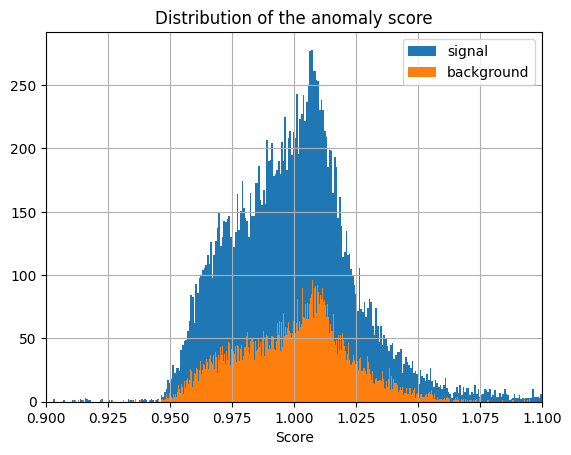

In [16]:
from scipy.stats import gaussian_kde

scores = get_scores(mydata.data).detach().numpy()
plt.hist(scores[mydata.labels==1],bins=50000, label='signal')
plt.hist(scores[mydata.labels==0],bins=50000, label='background')
plt.xlim((0.9,1.1))
plt.grid(True)
plt.xlabel('Score')
plt.title('Distribution of the anomaly score')
plt.legend()

In [23]:
import numpy as np
from scipy.stats import gaussian_kde

# Create a Gaussian KDE for your data
kde_sg = gaussian_kde(scores_sg)
kde_bg = gaussian_kde(scores_bg)

# Point to get the probability for
point = 1.0

# Get the probability of the point
p_sg = kde_sg.evaluate(point)
p_bg = kde_bg.evaluate(point)

print(p_sg, p_bg)


NameError: name 'scores_sg' is not defined

In [17]:
def get_class(scores):
    signal_std = np.std(scores[mydata.labels==1])
    background_std = np.std(scores[mydata.labels==0])

    # Calculate the threshold as the midpoint between the means
    threshold = (signal_mean + background_mean) / 2

    return (scores >= threshold).astype(int)


array([1, 1, 1, ..., 0, 1, 1])

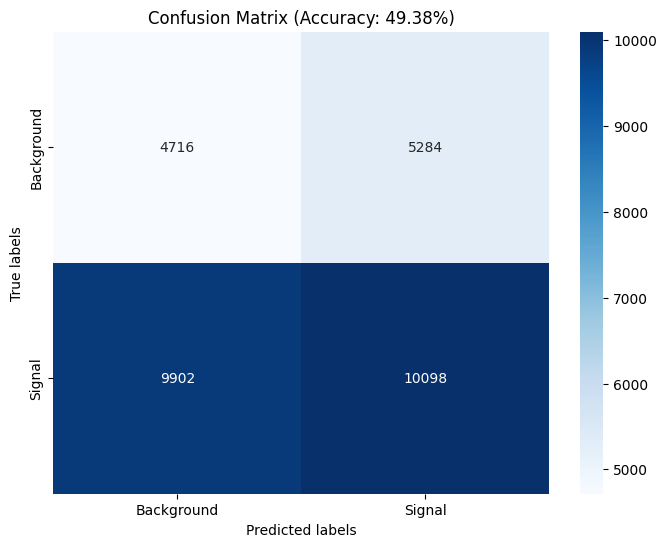

In [21]:
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
y_pred = get_class(scores)

cm = confusion_matrix(mydata.labels, y_pred)
accuracy = accuracy_score(mydata.labels, y_pred)*100
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Background", "Signal"], yticklabels=["Background", "Signal"])
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix (Accuracy: {:.2f}%)".format(accuracy))
plt.savefig('../docs/cm-ode.pdf', format='pdf')
plt.show()

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the likelihood ratio (ground truth)
def p_sig(x):
    logits, means, variances = mdn_signal.get_mixture_components(x)
    p = mog_log_prob(x, logits, means, variances)
    return p

def p_bg(x):
    logits, means, variances = mdn_background.get_mixture_components(x)
    p = mog_log_prob(x, logits, means, variances)
    return p

def likelihood_ratio(X):
    return p_sig(X) / p_bg(X)

def ams(x):
    return torch.mean(2*((p_sig(x) + p_bg(x))*torch.log(1 + p_sig(x)/p_bg(x)) - p_sig(x)))


# Define the classifier model
class LikelihoodRatioClassifier(nn.Module):
    def __init__(self, input_size):
        super(LikelihoodRatioClassifier, self).__init__()
        self.fc = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()
        # self.softmax = nn.Softmax()

    def forward(self, x):
        x = self.fc(x)
        return self.sigmoid(x)

# Initialize the classifier
input_size = mydata.data.shape[1]  # Assuming X is a 2D tensor
classifier = LikelihoodRatioClassifier(input_size)

# Define the loss function
def custom_loss(y_pred, y_true, x, Lambda: float= 0.4):
    # likelihood_ratios = likelihood_ratio(mydata.data)
    return Lambda*(1/likelihood_ratio(x) - 1 + y_pred) +  nn.BCELoss()(y_pred, y_true)

# Define the optimizer
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = classifier(mydata.data)
    y_pred = (y_pred > 0.5).int()
    y_true = torch.tensor(mydata.labels)#.view(-1,1)
    loss = custom_loss(y_pred.view(-1), y_true, mydata.data)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Use the trained classifier for anomaly detection
# classifier.eval()
# y_pred = classifier(X)

NameError: name 'mydata' is not defined

In [87]:
mydata.data[0]

tensor([ 1.2033e+01, -1.1467e-01,  1.3517e-01,  6.4417e-03,  1.4279e+00])

In [76]:
ams(mydata.data)

tensor(-5.2678, grad_fn=<MeanBackward0>)

In [92]:
y_pred.view(-1)

tensor([0, 0, 0,  ..., 1, 0, 0], dtype=torch.int32)

In [96]:
nn.BCELoss()(y_pred.view(-1), y_true)

RuntimeError: Found dtype Double but expected Int

In [83]:
y_true

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])